In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
medals = pd.read_csv("olympics_08_medalists.csv")
# Look at untidy data
print(medals.head())

       medalist_name male_archery female_archery male_athletics  \
0    Aaron Armstrong          NaN            NaN           gold   
1      Aaron Peirsol          NaN            NaN            NaN   
2   Abdullo Tangriev          NaN            NaN            NaN   
3  Abeer Abdelrahman          NaN            NaN            NaN   
4            Abhinav          NaN            NaN            NaN   

  female_athletics male_badminton female_badminton male_baseball  \
0              NaN            NaN              NaN           NaN   
1              NaN            NaN              NaN           NaN   
2              NaN            NaN              NaN           NaN   
3              NaN            NaN              NaN           NaN   
4              NaN            NaN              NaN           NaN   

  male_basketball female_basketball  ... female_beach volleyball  \
0             NaN               NaN  ...                     NaN   
1             NaN               NaN  ...            

## Make Tidy Data

In [ ]:
# Create a rank amongst gold, silver, bronze. This will come in handy later with sorting.
medal_rank = {"gold": 0, "silver": 1, "bronze": 2}

# Method Chaining
medals_clean = (
    # Convert format wide to long
    pd.melt(
        medals,
        id_vars=["medalist_name"],
        value_vars=medals.columns[1:],
        var_name="Event",
        value_name="Medal"
    )
    # Remove any athletes who did not win medals
    .dropna()
    # Create new columns to split events by gender and replace any "-" or "_" with space
    .assign(
        Gender=lambda df: df["Event"].str.split("_", n=1).str[0],
        Event=lambda df: df["Event"].str.split("_", n=1).str[1].str.replace("[_-]", " ").str.title()
    )
    # Make name column more readable
    .rename(columns={
        "medalist_name": "Name"
    })
    # Sort by event, gender, then name
    .sort_values(by=["Event", "Gender", "Medal"], 
                 ascending=[True, True, True],
                 key=lambda col: col.map(medal_rank) if col.name == "Medal" else col)
)
# Print first 50 rows
print(medals_clean.head(50))

                     Name                Event   Medal  Gender
2656        Joo Hyun-Jung              Archery    gold  female
3705       Zhang Juanjuan              Archery    gold  female
2160            Chen Ling              Archery  silver  female
2472              Guo Dan              Archery  silver  female
3191       Park Sung-hyun              Archery  silver  female
2124      Bérengère Schuh              Archery  bronze  female
3424      Sophie Dodemont              Archery  bronze  female
3595      Virginie Arnold              Archery  bronze  female
3696           Yun Ok-hee              Archery  bronze  female
682          Im Dong-hyun              Archery    gold    male
920        Lee Chang-hwan              Archery    gold    male
1710         Viktor Ruban              Archery    gold    male
676         Ilario Di Buò              Archery  silver    male
1043       Marco Galiazzo              Archery  silver    male
1107        Mauro Nespoli              Archery  silver 

## Exploratory Data Analysis

#### Explore Medal Counts for Each Gender per Event

In [52]:
pivot_medals = medals_clean.pivot_table(index="Event", 
                                       columns="Gender", 
                                       values="Medal", 
                                       aggfunc="count", 
                                       fill_value=0)

print(pivot_medals)

Gender                 female  male
Event                              
Archery                     9    11
Artistic Gymnastics        20    29
Association Football       54    55
Athletics                  81    85
Badminton                  10    12
Baseball                    0    72
Basketball                 36    35
Beach Volleyball            6     6
Bmx                         3     3
Boxing                      0    44
Canoeing And Kayaking      21    53
Diving                     13    16
Equestrian Sport           20    18
Fencing                    26    28
Field Hockey               48    50
Freestyle Wrestling        16    28
Greco-Roman Wrestling       0    27
Handball                   42    43
Judo                       28    28
Modern Pentathlon           2     3
Mountain Biking             3     3
Rhythmic Gymnastics        21     0
Road Bicycle Racing         6     5
Rowing                     58    83
Sailing                    21    33
Shooting Sport             1

The most interesting detail from this aggregate table is that there are many sports that awarded medals to one gender but not the other. For example, Rhythmic Gymnastics appears to be solely a female sport while Greco-Roman Wrestling seems to only be a male sport. Let's see which events only award medals to one gender:

In [53]:
# Filter rows where either female or male count is zero
zero_rows = pivot_medals[(pivot_medals["female"] == 0) | (pivot_table["male"] == 0)]

# Print the result
print(zero_rows)

Gender                 female  male
Event                              
Baseball                    0    72
Boxing                      0    44
Greco-Roman Wrestling       0    27
Rhythmic Gymnastics        21     0
Softball                   45     0
Synchronized Swimming      29     0


As you can see, there are 3 sports that only award medals to males (Baseball, Boxing, and Greco-Roman Wrestling) and 3 sports that only award medals to females (Rhythmic Gymnastics, Softball, and Synchronized Swimming).

#### It can also be helpful to visualize the medal count by gender with a grouped bar plot.

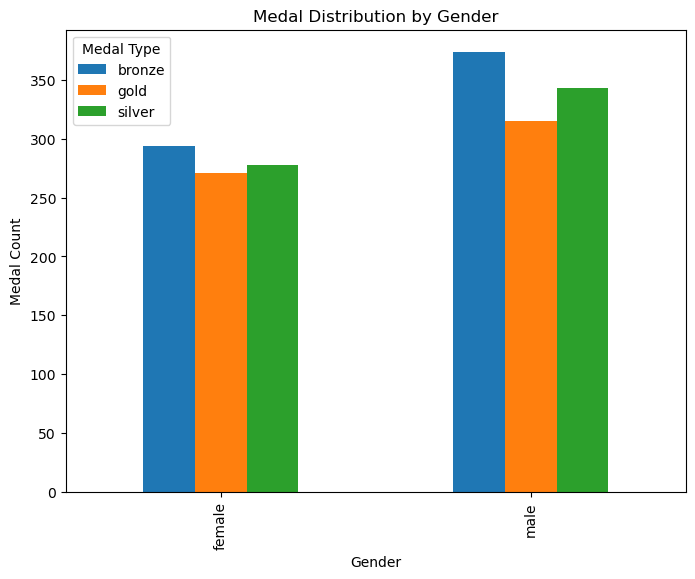

In [39]:

# Count medals per gender
gender_counts = medals_clean.groupby(["Gender", "Medal"]).size().unstack()

# Plot
gender_counts.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Gender")
plt.ylabel("Medal Count")
plt.title("Medal Distribution by Gender")
plt.legend(title="Medal Type")
plt.show()

It is interesting to note that more men were awarded medals at the 2008 olympics than women. This could be used as evidence for further exploration into gender inequalities within the olympic games.

#### It can also be interesting to explore total medal count awarded per event.

/var/folders/9_/dnf4s4s91j3_b5_f0crqg4580000gn/T/ipykernel_57216/1618381995.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Medal Type")


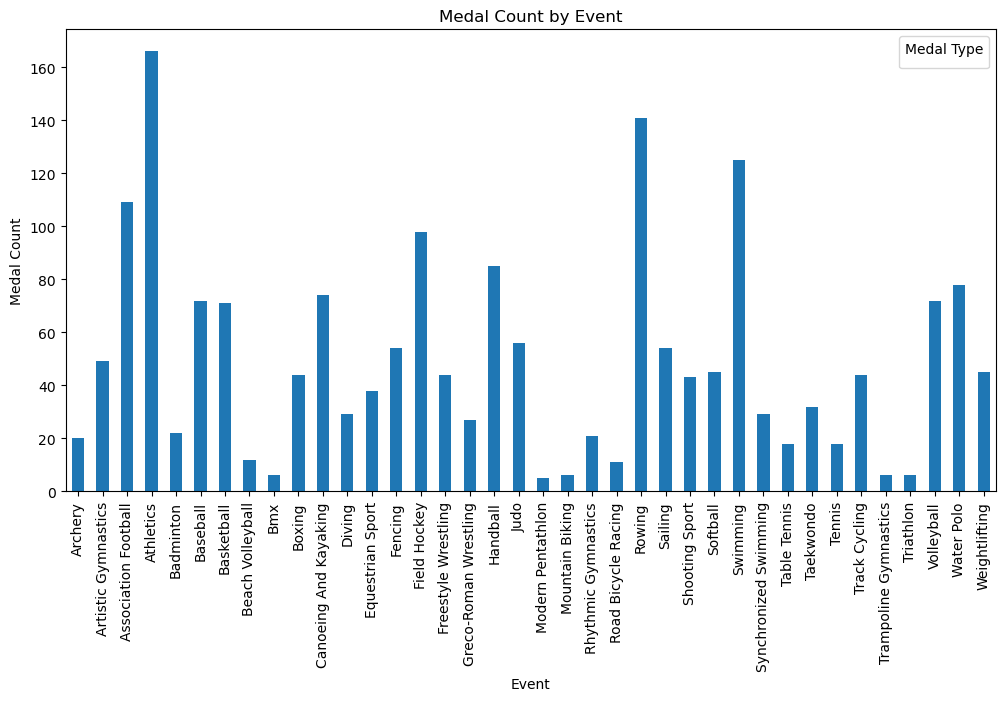

In [48]:
# Count medals per event
event_counts = medals_clean.groupby(["Event"]).size()

# Create Plot
event_counts.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Event")
plt.ylabel("Medal Count")
plt.title("Medal Count by Event")
plt.legend(title="Medal Type")
plt.show()

As you can see, multi-faceted events such as Athletics, Rowing, and Swimming along with team events such as Association Football, Field Hockey, and Water polo have the largest numbers of medals awarded. These events either have a diverse amounts of rounds which each have their own individual medal awards, or they are team sports and award a larger number of people the same medal.